In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
df = pd.read_csv(r'D:\Learn Python for Data Analysis\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')

In [3]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

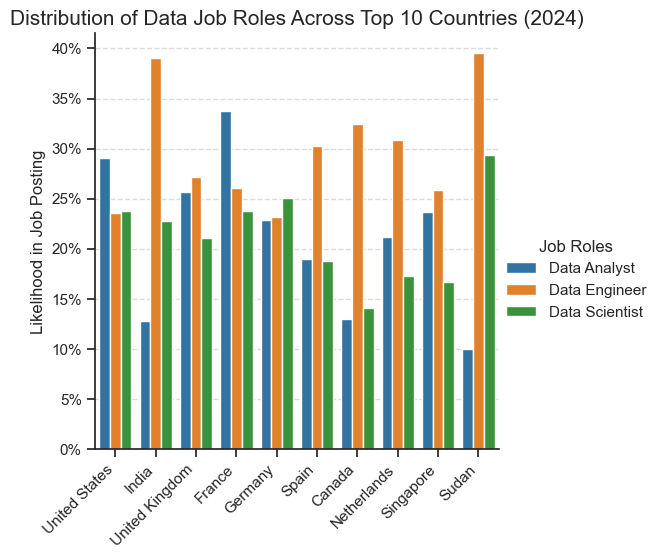

In [4]:

from matplotlib.ticker import PercentFormatter

job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']
top_n = 10

# Filter 2024 data
df_2024 = df[df['job_posted_date'].dt.year == 2024]

# Count the number of job postings per country
df_country_cnt = (
    df_2024['job_country']
    .value_counts()
    .reset_index(name='country_cnt')
)

# Get the top N countries
top_countries = df_country_cnt.head(top_n)['job_country']

# Filter by job titles and top countries
df_filtered = df_2024[
    df_2024['job_title_short'].isin(job_titles) &
    df_2024['job_country'].isin(top_countries)
]

# Count the number of postings by country and job title
df_country_title = (
    df_filtered.groupby(['job_country', 'job_title_short'])
    .size()
    .reset_index(name='title_count')
)

# MMerge with total count per country
df_merged = df_country_title.merge(df_country_cnt, how='left', on='job_country')
df_merged['title_pct'] = 100 * df_merged['title_count'] / df_merged['country_cnt']

# Plotting
sns.set_theme(style='ticks')

g = sns.catplot(
    data=df_merged,
    kind='bar',
    x='job_country',
    y='title_pct',
    hue='job_title_short',
    palette='tab10',
    order=top_countries
)
g._legend.set_title('Job Roles')
g._legend.set_loc('center right')

plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.ylabel('Likelihood in Job Posting')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.title(f'Distribution of Data Job Roles Across Top {top_n} Countries (2024)', fontsize=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()